In [1]:
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.10.2) on 2023-08-07 15:24.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

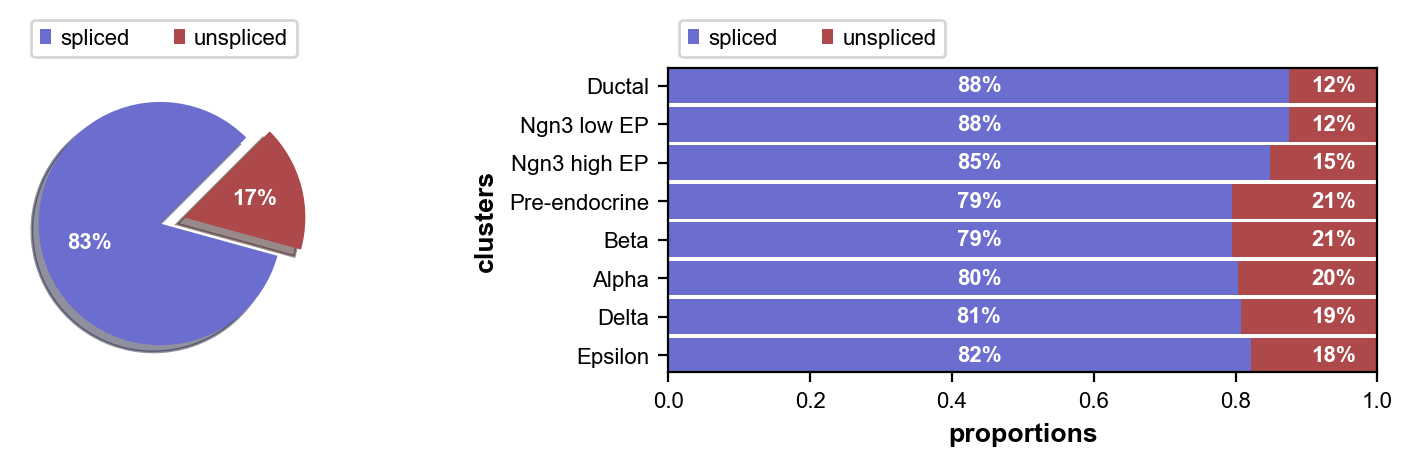

In [4]:
scv.pl.proportions(adata)

In [5]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [6]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 55 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:23) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [7]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [8]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:29) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [9]:
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


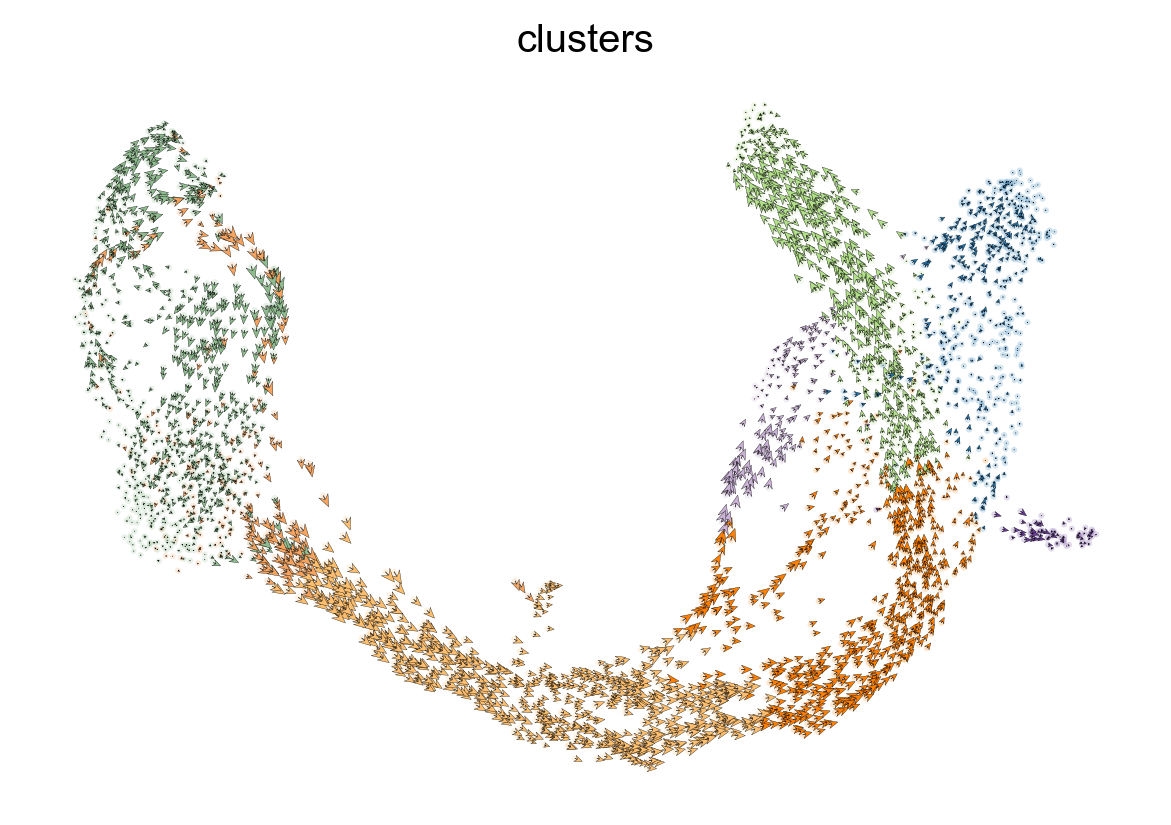

In [10]:
scv.pl.velocity_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

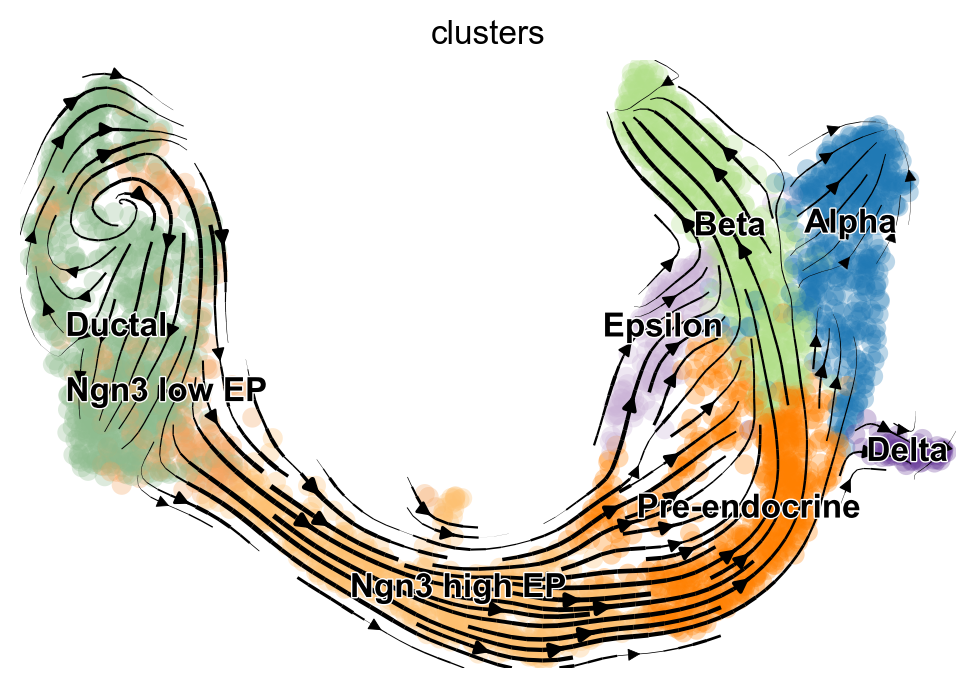

In [11]:
scv.pl.velocity_embedding_stream(adata, basis='umap')

In [12]:
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

In [13]:
G1=adata.uns['velocity_graph']
print(G1)

  (0, 83)	0.06189398
  (0, 130)	0.24667642
  (0, 140)	0.16257897
  (0, 161)	0.042699467
  (0, 168)	0.013434425
  (0, 179)	0.18583827
  (0, 204)	0.06116022
  (0, 205)	0.19086161
  (0, 216)	0.09818852
  (0, 243)	0.066641994
  (0, 246)	0.11733461
  (0, 267)	0.0616607
  (0, 275)	0.25206435
  (0, 279)	0.030722799
  (0, 324)	0.21329257
  (0, 340)	0.12732208
  (0, 356)	0.14557491
  (0, 363)	0.17861539
  (0, 378)	0.23802008
  (0, 396)	0.048639078
  (0, 407)	0.08898947
  (0, 433)	0.17888685
  (0, 447)	0.15598024
  (0, 483)	0.066454716
  (0, 496)	0.11382771
  :	:
  (3695, 2912)	0.13130444
  (3695, 2986)	0.026357552
  (3695, 3014)	0.15604343
  (3695, 3036)	0.12202973
  (3695, 3069)	0.1782852
  (3695, 3103)	0.1704089
  (3695, 3113)	0.102144666
  (3695, 3151)	0.17022625
  (3695, 3215)	0.18432902
  (3695, 3217)	0.13887048
  (3695, 3244)	0.059286144
  (3695, 3245)	0.19270258
  (3695, 3259)	0.13357227
  (3695, 3291)	0.06432303
  (3695, 3301)	0.18392265
  (3695, 3338)	0.2038681
  (3695, 3379)	0.0690512

In [14]:
v1=adata.obsm['velocity_umap']

In [15]:
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

In [16]:
val = adata.layers['velocity']

In [17]:
val

array([[ 4.5808613e-02, -1.3873547e-02,  9.0656602e-01, ...,
         8.0727398e-02,  1.0245642e-01, -1.8395028e-01],
       [ 5.8600400e-02, -1.0649812e-01,  3.0264544e-01, ...,
         5.4412693e-02,  4.7918819e-02,  1.1497691e-01],
       [ 5.8696300e-02,  3.6134608e-03, -9.0698600e-03, ...,
         1.0203939e-01,  2.6801104e-02, -1.2865394e-01],
       ...,
       [ 2.9476350e-02, -1.1030324e-01,  4.1962868e-01, ...,
        -7.0206448e-04,  3.6405258e-02,  7.9088748e-02],
       [ 1.6557544e-01, -3.1810284e-02,  2.6294291e-01, ...,
        -1.6426595e-01,  1.0209341e-01, -2.8426749e-01],
       [ 6.5032780e-02, -5.0073288e-02,  4.0662965e-01, ...,
         1.1356676e-01, -2.2384863e-02, -1.7942652e-01]], dtype=float32)

In [18]:
adata.layers['velocity'] = -val

In [19]:
adata.layers['velocity']

array([[-4.5808613e-02,  1.3873547e-02, -9.0656602e-01, ...,
        -8.0727398e-02, -1.0245642e-01,  1.8395028e-01],
       [-5.8600400e-02,  1.0649812e-01, -3.0264544e-01, ...,
        -5.4412693e-02, -4.7918819e-02, -1.1497691e-01],
       [-5.8696300e-02, -3.6134608e-03,  9.0698600e-03, ...,
        -1.0203939e-01, -2.6801104e-02,  1.2865394e-01],
       ...,
       [-2.9476350e-02,  1.1030324e-01, -4.1962868e-01, ...,
         7.0206448e-04, -3.6405258e-02, -7.9088748e-02],
       [-1.6557544e-01,  3.1810284e-02, -2.6294291e-01, ...,
         1.6426595e-01, -1.0209341e-01,  2.8426749e-01],
       [-6.5032780e-02,  5.0073288e-02, -4.0662965e-01, ...,
        -1.1356676e-01,  2.2384863e-02,  1.7942652e-01]], dtype=float32)

In [20]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:27) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [21]:
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


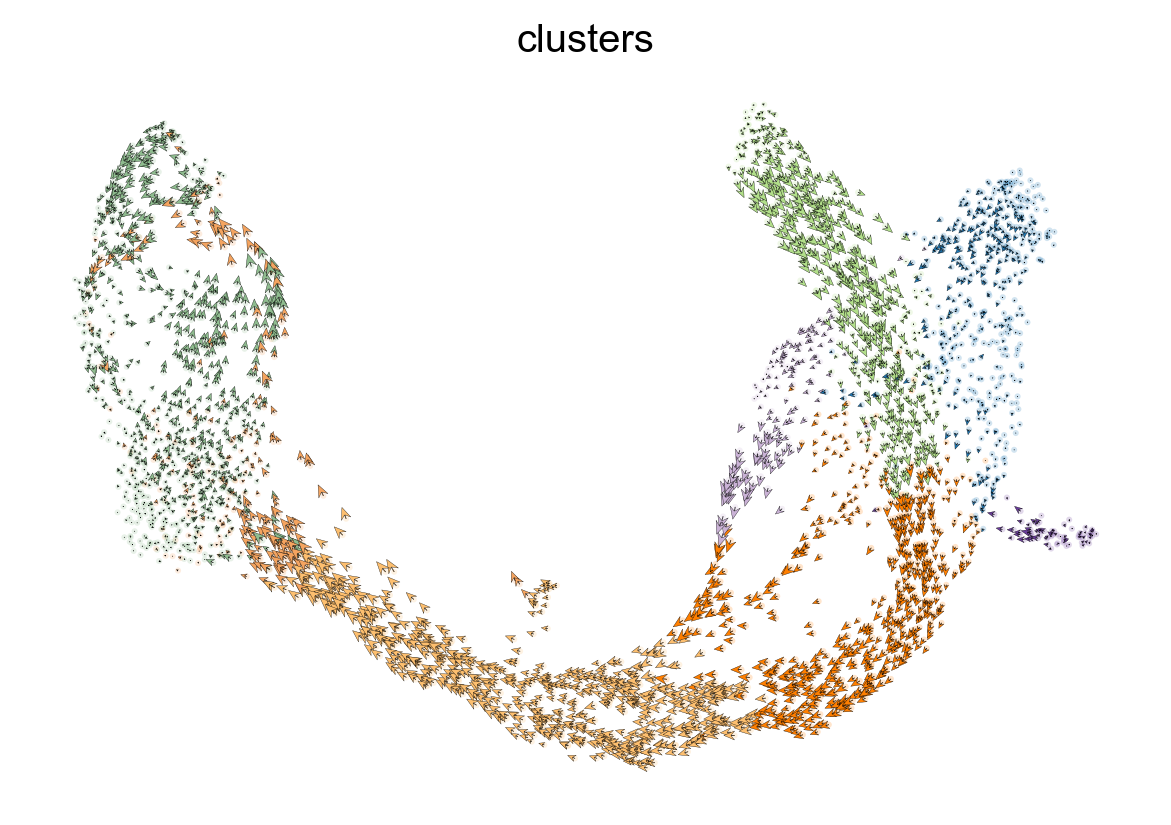

In [22]:
scv.pl.velocity_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

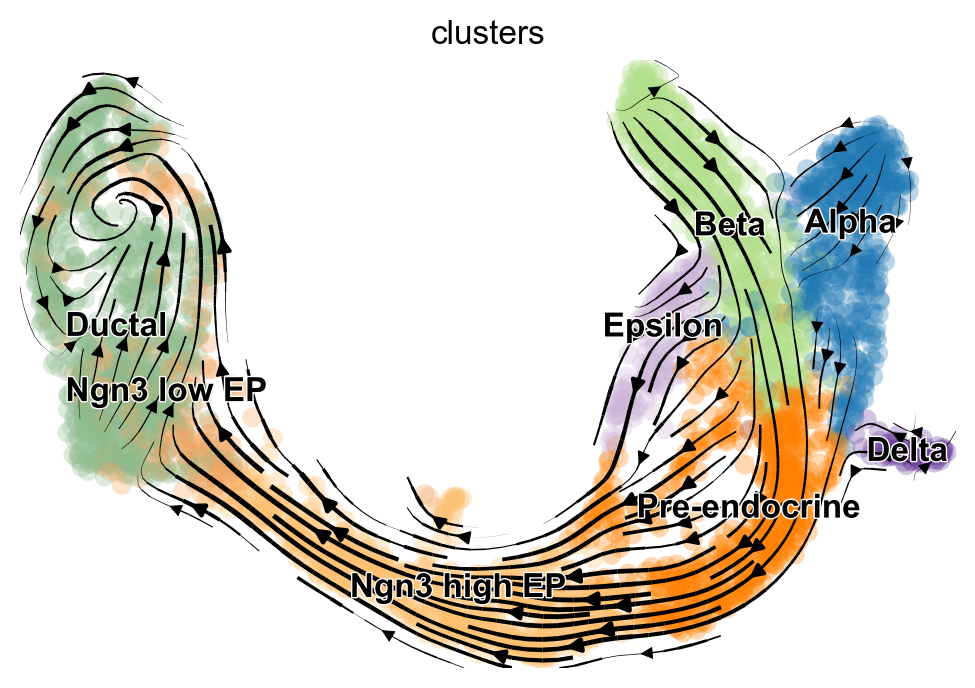

In [23]:
scv.pl.velocity_embedding_stream(adata, basis='umap')

In [24]:
G2=adata.uns['velocity_graph']
print(G2)

  (0, 853)	0.004158544
  (0, 1046)	0.0012874181
  (0, 1194)	0.007342213
  (0, 1910)	0.007901775
  (0, 2709)	0.0013945007
  (1, 160)	0.0019623344
  (1, 256)	0.0053429864
  (1, 265)	0.00066096865
  (1, 281)	0.018538686
  (1, 352)	0.0016585913
  (1, 488)	0.015203024
  (1, 752)	0.015389559
  (1, 754)	0.04410917
  (1, 836)	0.0037950738
  (1, 903)	0.0010202518
  (1, 950)	0.01189169
  (1, 963)	0.016083745
  (1, 1054)	0.023800822
  (1, 1154)	0.028162155
  (1, 1196)	0.028972082
  (1, 1326)	0.012499224
  (1, 1330)	0.015259541
  (1, 1363)	0.05213743
  (1, 1405)	0.022297451
  (1, 1460)	0.019701714
  :	:
  (3692, 3278)	0.01657017
  (3692, 3415)	0.028597564
  (3695, 139)	0.04796667
  (3695, 183)	0.02272048
  (3695, 262)	0.044434913
  (3695, 359)	0.03097007
  (3695, 408)	0.040732957
  (3695, 458)	0.03785287
  (3695, 510)	0.048090164
  (3695, 719)	0.05668905
  (3695, 1268)	0.03803715
  (3695, 1376)	0.04975535
  (3695, 1593)	0.04128734
  (3695, 1839)	0.039400727
  (3695, 1855)	0.06337393
  (3695, 2082)

In [25]:
v2=adata.obsm['velocity_umap']

In [26]:
import pandas as pd

In [27]:
pd.DataFrame(G1)

,0
0,"(0, 83)\t0.06189398\n (0, 130)\t0.24667642\..."
1,"(0, 9)\t0.02024469\n (0, 14)\t0.049574763\n..."
2,"(0, 0)\t0.16291675\n (0, 24)\t0.25774136\n ..."
3,"(0, 8)\t0.21600719\n (0, 30)\t0.24173944\n ..."
4,"(0, 59)\t0.16580859\n (0, 61)\t0.23638004\n..."
...,...
3691,"(0, 0)\t0.2873987\n (0, 12)\t0.23068394\n ..."
3692,"(0, 54)\t0.29916307\n (0, 67)\t0.29783463\n..."
3693,"(0, 1)\t0.2313814\n (0, 9)\t0.14752778\n (..."
3694,"(0, 6)\t0.17829391\n (0, 42)\t0.21477097\n ..."


In [28]:
#pd.DataFrame(G1).to_csv("E:/JupyterNotebook/RNA_Acceleration/data/G1.csv")

In [29]:
#pd.DataFrame(G2).to_csv("E:/JupyterNotebook/RNA_Acceleration/data/G2.csv")

In [30]:
pd.DataFrame(G2)

,0
0,"(0, 853)\t0.004158544\n (0, 1046)\t0.001287..."
1,"(0, 160)\t0.0019623344\n (0, 256)\t0.005342..."
2,
3,"(0, 982)\t0.02557377\n (0, 3197)\t0.0004187..."
4,"(0, 67)\t0.08584891\n (0, 134)\t0.045076475..."
...,...
3691,"(0, 94)\t0.08055071\n (0, 123)\t0.093824156..."
3692,"(0, 306)\t0.081968546\n (0, 490)\t0.0147348..."
3693,
3694,


In [31]:
G1

<3696x3696 sparse matrix of type '<class 'numpy.float32'>'
	with 593593 stored elements in Compressed Sparse Row format>

In [32]:
Gr1 = G1.tocoo()

In [33]:
df1 = pd.DataFrame({'node1': Gr1.row, 'node2': Gr1.col, 'edge_weight': Gr1.data}) 

In [34]:
#df1.to_csv("E:/JupyterNotebook/RNA_Acceleration/data/G1.csv")

In [35]:
df1

,node1,node2,edge_weight
0,0,83,0.061894
1,0,130,0.246676
2,0,140,0.162579
3,0,161,0.042699
4,0,168,0.013434
...,...,...,...
593588,3695,3509,0.028487
593589,3695,3528,0.106559
593590,3695,3579,0.167595
593591,3695,3617,0.160541


In [36]:
Gr2 = G2.tocoo()
df2 = pd.DataFrame({'node1': Gr2.row, 'node2': Gr2.col, 'edge_weight': Gr2.data}) 
#df2.to_csv("E:/JupyterNotebook/RNA_Acceleration/data/G2.csv")

In [37]:
df2

,node1,node2,edge_weight
0,0,853,0.004159
1,0,1046,0.001287
2,0,1194,0.007342
3,0,1910,0.007902
4,0,2709,0.001395
...,...,...,...
84767,3695,3093,0.036930
84768,3695,3175,0.037674
84769,3695,3358,0.041374
84770,3695,3488,0.011183


In [38]:
v1

array([[-0.01445721,  0.03687537],
       [-0.02055266, -0.03067125],
       [ 0.00251539,  0.01503211],
       ...,
       [-0.01804832, -0.01221793],
       [ 0.02234725,  0.01966884],
       [ 0.04263628,  0.02652252]])

In [39]:
v2

array([[ 0.01434192, -0.03658129],
       [ 0.02190516,  0.03268963],
       [-0.00250023, -0.01494132],
       ...,
       [ 0.01794435,  0.01214755],
       [-0.02216562, -0.01950898],
       [-0.04304069, -0.02677409]])